<h3>UNITS</h3>

In [126]:
import astropy.units as u

In [127]:
#functions in sunpy w/ numbers associated with physical quantities use Quantity objects
#represent both number & a unit
#allows conversions

length = 10 * u.meter
print(length)

mass = 20 * u.kilogram
print(mass)

10.0 m
20.0 kg


In [128]:
#extract unit from a quantity
mass.unit

Unit("kg")

In [129]:
#extract value from a quantity
mass.value

20.0

In [130]:
# use arithmetic with units
# example: calculating force of gravity with F=mg
g = 9.8 * u.meter / (u.s * u.s)
weight = mass * g
weight

<Quantity 196. kg m / s2>

In [131]:
#convert units
length = length.to(u.km)
length

<Quantity 0.01 km>

In [132]:
#functions w/ agruments need correct units for inputs (units need to be at least converitble to stated)
@u.quantity_input
def speed(dist: u.m, time: u.s):
    return dist / time

speed(length.to(u.m), (5 * u.s))

<Quantity 2. m / s>

<h3>TIME</h3>

In [133]:
#returns consistent time object: string representation of date -> Time object
from sunpy.time import parse_time

In [134]:
#create different time objects
ex_date = '2010-11-25T03:42:12'
parse_time(ex_date)

<Time object: scale='utc' format='isot' value=2010-11-25T03:42:12.000>

In [135]:
parse_time(894316092.00000000, format='utime')

<Time object: scale='utc' format='utime' value=894316092.0>

In [136]:
#use time ranges
from sunpy.time import TimeRange

time_range = TimeRange(ex_date, '2010-12-05T17:02:43')
time_range = TimeRange(ex_date, 60 * u.minute)

In [137]:
print(time_range.center)
print(time_range.seconds)

2010-11-25T04:12:12.000
3600.0000000000064 s


In [138]:
#split into equal subsets
time_range.split(3)

[   <sunpy.time.timerange.TimeRange object at 0x17d00e810>
     Start: 2010-11-25 03:42:12
     End:   2010-11-25 04:02:12
     Center:2010-11-25 03:52:12
     Duration:0.01388888888888895 days or
            0.3333333333333348 hours or
            20.00000000000009 minutes or
            1200.0000000000052 seconds,
     Start: 2010-11-25 04:02:12
     End:   2010-11-25 04:22:12
     Center:2010-11-25 04:12:12
     Duration:0.01388888888888895 days or
            0.3333333333333348 hours or
            20.00000000000009 minutes or
            1200.0000000000052 seconds,
     Start: 2010-11-25 04:22:12
     End:   2010-11-25 04:42:12
     Center:2010-11-25 04:32:12
     Duration:0.01388888888888895 days or
            0.3333333333333348 hours or
            20.00000000000009 minutes or
            1200.0000000000052 seconds]

<h3>COORDINATES</h3>

In [139]:
#coordinates can represent both points in physical 3D space and 2D projected coordinates in images
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [140]:
#SkyCoord object can represent a point on the sun
coord = SkyCoord(70*u.deg, -30*u.deg, obstime='2020-04-03', frame=frames.HeliographicStonyhurst)
coord

<SkyCoord (HeliographicStonyhurst: obstime=2020-04-03T00:00:00.000, rsun=695700.0 km): (lon, lat) in deg
    (70., -30.)>

In [141]:
#transform coord to any other coordinate frame defined in either Astropy or sunpy see:
#https://docs.sunpy.org/en/stable/reference/coordinates/index.html#sunpy-coordinate-systems
coord.transform_to(frames.Helioprojective(observer='earth')) #observer must be known for Helioprojective & Heliocentric

<SkyCoord (Helioprojective: obstime=2020-04-03T00:00:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (782.01295298, -445.63980075, 1.49331591e+08)>

In [142]:
#3D->astrophysical frames
coord.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km)
    (143.381589, -7.18484185, 996203.87993116)>

In [143]:
#list of coordinates
c = SkyCoord([-200, 400, 170]*u.arcsec, [100, 200, -30]*u.arcsec, frame=frames.Helioprojective)
c[0]

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=None): (Tx, Ty) in arcsec
    (-200., 100.)>

2026-02-01 19:01:06 - astropy - WARNING: VerifyWarning: Invalid 'BLANK' keyword in header.  The 'BLANK' keyword is only applicable to integer data, and will be ignored in this HDU.


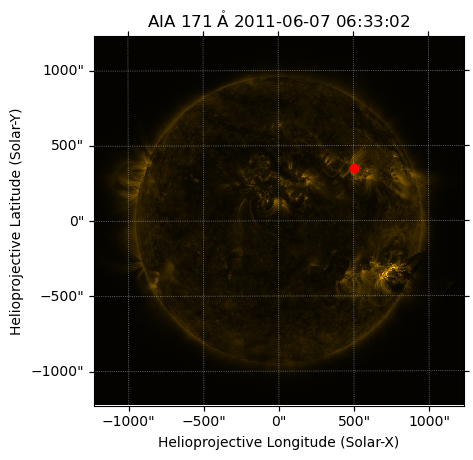

In [144]:
#using coordiantes with maps to sepcify locations on images
import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE as img
import matplotlib.pyplot as plt

m = sunpy.map.Map(img) #create a map

coord_in_map = SkyCoord(500*u.arcsec, 350*u.arcsec, frame=m.coordinate_frame)
pixels = m.wcs.world_to_pixel(coord_in_map) #get array of the pixels on the image from the coordinates

# plot coordinate onto map using matplotlib
fig = plt.figure()
ax = plt.subplot(projection=m)
m.plot()

ax.plot_coord(coord_in_map, 'o', c='red')

<h3>AQUIRING DATA</h3>

In [145]:
#use Fido interface to easily aquire solar physics data
from sunpy.net import Fido, attrs as a
print(Fido)

sunpy.net.Fido

Fido is a unified data search and retrieval tool.

It provides simultaneous access to a variety of online data sources, some
cover multiple instruments and data products like the Virtual Solar
Observatory and some are specific to a single source.

For details of using `~sunpy.net.Fido` see :ref:`sunpy-tutorial-acquiring-data-index`.


      Client      ...
----------------- ...
CDAWEBClient      ...
ADAPTClient       ...
AIASynopsisClient ...
EVEClient         ...
GBMClient         ...
XRSClient         ...
SUVIClient        ...
GONGClient        ...
LYRAClient        ...
NOAAIndicesClient ...
NOAAPredictClient ...
SRSClient         ...
NoRHClient        ...
RHESSIClient      ...
HEKClient         ...
HECClient         ...
JSOCClient        ...
VSOClient         ...


In [146]:
# to search for data with Fido, specify attributes to search with
#print(a.Time)
print(a.Instrument)
#print(a.Wavelength)

sunpy.net.attrs.Instrument

Specifies the Instrument name for the search.

       Attribute Name       ...
--------------------------- ...
adapt                       ...
aia                         ...
aia                         ...
bcs                         ...
be_continuum                ...
be_halpha                   ...
bigbear                     ...
caii                        ...
cds                         ...
celias                      ...
cerrotololo                 ...
chp                         ...
cook                        ...
costep                      ...
cp                          ...
dpm                         ...
eis                         ...
eit                         ...
elteide                     ...
erne                        ...
eui                         ...
eve                         ...
eve                         ...
film                        ...
five_12_channelmagnetograph ...
foxsi                       ...
gbm                         .

In [147]:
# this returns an UnifiedResponse object containing all the search results that match the search attributes
# this does not download the files
results = Fido.search(a.Time('2012/3/4', '2012/3/4'), a.Instrument.aia, a.Wavelength(171*u.angstrom) | a.Wavelength(211*u.angstrom))
print(results)

Results from 2 Providers:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2012-03-04 00:00:00.000 2012-03-04 00:00:01.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport
To

In [148]:
results[1,:] 

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2012-03-04 00:00:00.000,2012-03-04 00:00:01.000,SDO,AIA,211.0 .. 211.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


In [149]:
#use to filter data for only needed
results.all_colnames

['End Time',
 'Extent Length',
 'Extent Type',
 'Extent Width',
 'Instrument',
 'Physobs',
 'Provider',
 'Size',
 'Source',
 'Start Time',
 'Wavelength',
 'Wavetype',
 'fileid']

In [150]:
results[0].show('Start Time', 'Source', 'Instrument', 'Wavelength')

Start Time,Source,Instrument,Wavelength
,,,Angstrom
Time,str3,str3,float64[2]
2012-03-04 00:00:00.000,SDO,AIA,171.0 .. 171.0


In [152]:
results = Fido.search(a.Time("2020/01/01", "2020/01/01 00:01"), a.Instrument.aia | a.Instrument.hmi)

#more filtering post-search
aia, hmi = results
aia_wv = aia[aia['Wavelength'][:,0] == 211 *u.angstrom]
aia_wv.show('Start Time', 'Source', 'Instrument', 'Wavelength')

Start Time,Source,Instrument,Wavelength
,,,Angstrom
Time,str3,str3,float64[2]
2020-01-01 00:00:09.000,SDO,AIA,211.0 .. 211.0
2020-01-01 00:00:21.000,SDO,AIA,211.0 .. 211.0
2020-01-01 00:00:33.000,SDO,AIA,211.0 .. 211.0
2020-01-01 00:00:45.000,SDO,AIA,211.0 .. 211.0
2020-01-01 00:00:57.000,SDO,AIA,211.0 .. 211.0


In [156]:
#download data from the files located in the Fido search
downloaded_files = Fido.fetch(aia_wv[0], path='/Users/sana/sunpy/data/example_downloaded_data')
downloaded_files

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.211A_2020_01_01T00_00_09.63Z.image_lev1.fits:   0%|          | 0.00/8.95M [00:00<?, ?B/s]

['/Users/sana/sunpy/data/example_downloaded_data/aia.lev1.211A_2020_01_01T00_00_09.63Z.image_lev1.fits']

<h3>FINDING AND DOWNLOADING DATA SPECIFICALLY FROM JSOC</h3>

Joint Science Operations Center (JSOC) contains data products from the Solar Dynamics Observatory, as well as certain other missions and instruments. These data are available from the JSOC database, which can be directly accessed by the online JSOC interface.

sunpy’s JSOC Client provides an easier interface to query for JSOC data and make export requests. It uses drms module as its backend.

There are two ways of downloading JSOC data. One way is using sunpy’s unified search interface, known as `Fido`. Fido supplies a single, easy and consistent way to to obtain most forms of solar physics data. An alternative way to fetch data from JSOC is by using the underlying JSOC Client. This option can be preferred when you need to separate the staging and downloading steps, which is not supported by Fido.

The JSOC stages data before you can download it, so a JSOC query is a three stage process. First you query the JSOC for records and a table of these records is returned. Then you can request these records to be staged for download and then you can download them. Fido combines the last two stages into a single call to fetch.

NOTE: to download files you need to register an email with JSOC & use the a.jsoc.Notify('example@email.com') in the Fido.search query

register here: http://jsoc.stanford.edu/ajax/register_email.html

In [161]:
#1st method w/ Fido
#query needs a minimun: "Series" name and a "PrimeKey"
res = Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'), a.jsoc.Series('hmi.v_45s'))
res

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str23,str7,str10,float64,int64
2014.01.01_00:00:45_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:01:30_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:02:15_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:03:00_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:03:45_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:04:30_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:05:15_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:06:00_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:06:45_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145


In [163]:
a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'), a.jsoc.PrimeKey('WAVELNTH', '211')

(<sunpy.net.attrs.Time(2014-01-01 00:00:00.000, 2014-01-01 01:00:00.000)>,
 ('WAVELNTH', '211'))

In [166]:
# w/ >1 file for same query, distinguished using Segments
import drms
client = drms.Client()
si = client.info('hmi.sharp_720s')
print(si.segments.index.values)

['magnetogram' 'bitmap' 'Dopplergram' 'continuum' 'inclination' 'azimuth'
 'field' 'vlos_mag' 'dop_width' 'eta_0' 'damping' 'src_continuum'
 'src_grad' 'alpha_mag' 'chisq' 'conv_flag' 'info_map' 'confid_map'
 'inclination_err' 'azimuth_err' 'field_err' 'vlos_err' 'alpha_err'
 'field_inclination_err' 'field_az_err' 'inclin_azimuth_err'
 'field_alpha_err' 'inclination_alpha_err' 'azimuth_alpha_err' 'disambig'
 'conf_disambig']


In [168]:
Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'), a.jsoc.Series('hmi.sharp_720s'), 
            a.jsoc.Segment('Dopplergram') & a.jsoc.Segment('magnetogram'))

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str23,str7,str9,float64,int64
2014.01.01_00:00:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:12:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:24:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:36:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:48:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_01:00:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:00:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:12:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145
2014.01.01_00:24:00_TAI,SDO/HMI,HMI_SIDE1,6173.0,2145


In [172]:
#can also filter using keywords in metadata of the files
keywords = client.keys('hmi.sharp_720s')
keywords[0:10]

#each keyword needs to be compared to a value
#ex: a.jsoc.Keyword("bitmap_bzero") == 0 or a.jsoc.Keyword("bitmap_bzero") > 1

['cparms_sg000',
 'magnetogram_bzero',
 'magnetogram_bscale',
 'cparms_sg001',
 'bitmap_bzero',
 'bitmap_bscale',
 'cparms_sg002',
 'Dopplergram_bzero',
 'Dopplergram_bscale',
 'cparms_sg003']

In [173]:
#sample data at intervals of time, say every 10 minutes
Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'), a.jsoc.Series('hmi.v_45s'), a.Sample(10*u.min))

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str23,str7,str10,float64,int64
2014.01.01_00:00:45_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:10:30_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:20:15_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:30:00_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:39:45_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:49:30_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145
2014.01.01_00:59:15_TAI,SDO/HMI,HMI_FRONT2,6173.0,2145


<h4>Using JSOCClient for complex usage</h4>

In [190]:
from sunpy.net import jsoc

#step 1: making a query
client = jsoc.JSOCClient()

res = client.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'), a.jsoc.Series('hmi.v_45s'),
                    a.jsoc.Notify('sanadas1023@gmail.com'))

#step 2: staging the request
requests = client.request_data(res)

In [191]:
# must wait until status = 0
print(requests.id)
print(requests.status)

JSOC_20260202_001240
2


In [ ]:
#step 3: downloading the data
res = client.get_request(requests)
res.wait(progress=True)

<h3>MAPS</h3>

`Map` objects hold two-dimensional data along with the accompanying metadata. They can be used with any two-dimensional data array with two spatial axes and FITS-compliant metadata. The primary advantage of using a `Map` object over a bare `NumPy` array is the ability to perform coordinate aware operations on the underlying array, such as rotating the `Map` to remove the roll angle of an instrument or cropping a `Map` to a specific field of view. Additionally, because `Map` is capable of ingesting data from many different sources, it provides a common interface for any two-dimensional data product.

2026-02-01 20:06:11 - astropy - WARNING: VerifyWarning: Invalid 'BLANK' keyword in header.  The 'BLANK' keyword is only applicable to integer data, and will be ignored in this HDU.


Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2011-06-07 06:33:02
Exposure Time,0.234256 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.402792 2.402792] arcsec / pix
Reference Pixel,[511.5 511.5] pix

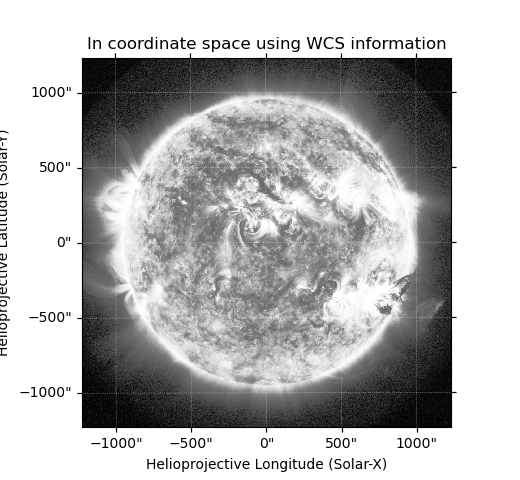
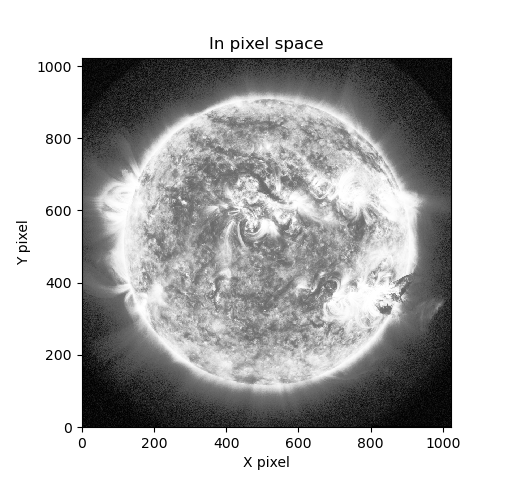
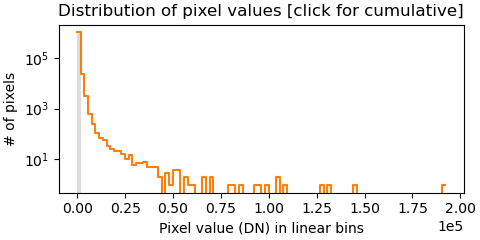
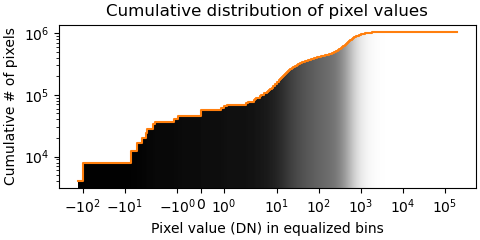

In [199]:
import sunpy.map

#use example image from ealier
map = sunpy.map.Map(img)
map #can also use map.quicklook() to open in a different tab

In [202]:
#grab metadata from map
map.date
map.exposure_time
map.scale
map.wavelength
map.dtype
map.dimensions

PixelPair(x=<Quantity 1024. pix>, y=<Quantity 1024. pix>)

In [201]:
#grab the actual data stored in a numpy.ndarray, and indexes of it
map.data

array([[ -95.92475  ,    7.076416 ,   -1.9656711, ..., -127.96519  ,
        -127.96519  , -127.96519  ],
       [ -96.97533  ,   -5.1167884,    0.       , ...,  -98.924576 ,
        -104.04137  , -127.919716 ],
       [ -93.99607  ,    1.0189276,   -4.0757103, ...,   -5.094638 ,
         -37.95505  , -127.87541  ],
       ...,
       [-128.01454  , -128.01454  , -128.01454  , ..., -128.01454  ,
        -128.01454  , -128.01454  ],
       [-127.899666 , -127.899666 , -127.899666 , ..., -127.899666 ,
        -127.899666 , -127.899666 ],
       [-128.03072  , -128.03072  , -128.03072  , ..., -128.03072  ,
        -128.03072  , -128.03072  ]], dtype=float32)

In [205]:
print(map.min())
print(map.max())
print(map.mean())

-129.78036
192130.17
427.02252


In [207]:
print(map.coordinate_frame)
print(map.observer_coordinate)
print(map.center)

<Helioprojective Frame (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>)>
<SkyCoord (HeliographicStonyhurst: obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>
<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>): (Tx, Ty) in arcsec
    (3.22309951, 1.38578135)>


WCS provides the transformation between the pixel coordinates of the image and physical or “world” coordinates. In particular, we will only focus on two methods: world_to_pixel and pixel_to_world.

In [208]:
map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN'
CUNIT : 'deg' 'deg'
CRVAL : 0.00089530541880571 0.00038493926472939
CRPIX : 512.5 512.5
PC1_1 PC1_2  : 0.99999706448085 0.0024230207763071
PC2_1 PC2_2  : -0.0024230207763071 0.99999706448085
CDELT : 0.00066744222222222 0.00066744222222222
NAXIS : 1024  1024

In [210]:
map.wcs.world_to_pixel(map.center) #look above at solar image to see in pixel space, the center is right!

(array(511.5), array(511.5))

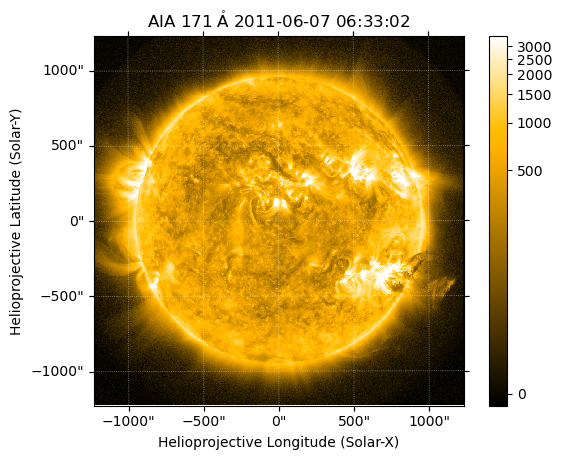

In [216]:
fig = plt.figure()
ax = fig.add_subplot(projection=map)
map.plot(axes=ax, clip_interval=(1,99.5)*u.percent) #adjust brightness by clipping out intervals of dim/bright
plt.colorbar()
plt.show()

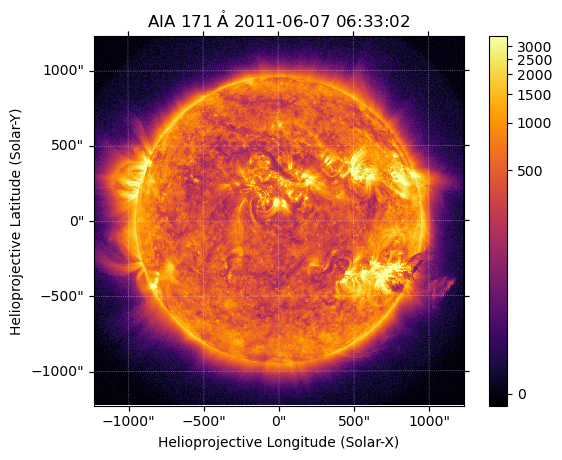

In [217]:
# add different color maps
fig = plt.figure()
ax = fig.add_subplot(projection=map)
map.plot(axes=ax, cmap='inferno', clip_interval=(1,99.5)*u.percent)
plt.colorbar()
plt.show()

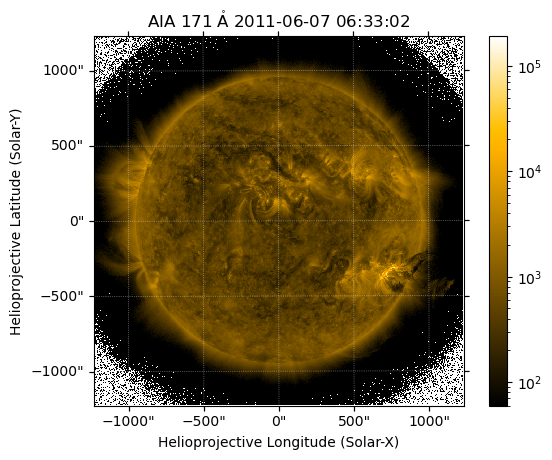

In [230]:
import matplotlib.colors

#normalization to make the colors linearly spaced
map.plot_settings['cmap'] = matplotlib.colormaps['sdoaia171'] #colormaps are based on instruments & wavelength
map.plot_settings['norm'] = matplotlib.colors.LogNorm(60, map.max())

fig = plt.figure()
ax = fig.add_subplot(projection=map)
map.plot(axes=ax)
plt.colorbar()
plt.show()

2026-02-01 20:51:52 - astropy - WARNING: VerifyWarning: Invalid 'BLANK' keyword in header.  The 'BLANK' keyword is only applicable to integer data, and will be ignored in this HDU.
/opt/anaconda3/lib/python3.11/site-packages/astropy/visualization/wcsaxes/patches.py:197: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  super().__init__(vertices, **kwargs)


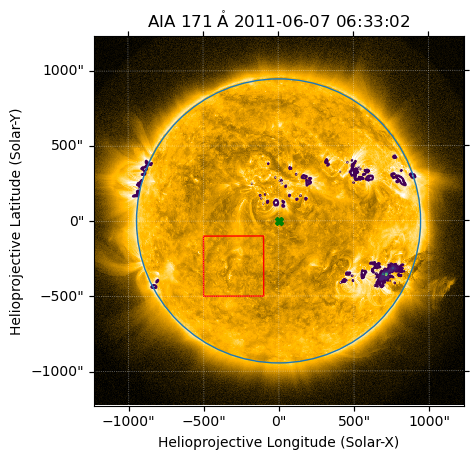

In [242]:
#test out differnent additions/modifications
map = sunpy.map.Map(img) 
fig = plt.figure()
ax = fig.add_subplot(projection=map)
map.plot(axes=ax, clip_interval=(1,99.5)*u.percent)

#overlaying contours and coordinates to highlight certain features
map.draw_contours([2, 5, 10, 50, 90] * u.percent, axes=ax)
#draw the solar limb
map.draw_limb(axes=ax, color='C0')
#plot a point on the map, in this case the center
ax.plot_coord(map.center, 'X', c='green')

#create an area of focus by boxing in a square
roi_bottom_left = SkyCoord(Tx=-500*u.arcsec, Ty=-500*u.arcsec, frame=map.coordinate_frame)
roi_top_right = SkyCoord(Tx=-100*u.arcsec, Ty=-100*u.arcsec, frame=map.coordinate_frame)
map.draw_quadrangle(roi_bottom_left, top_right=roi_top_right, axes=ax, color='red')

plt.show()

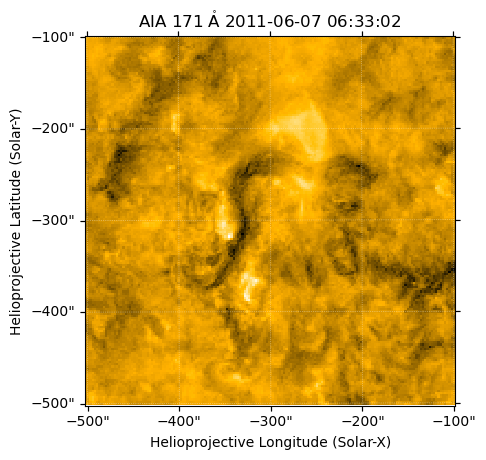

In [245]:
#zoom in on the same area of focus using the submap() function
sub_map = map.submap(roi_bottom_left, top_right=roi_top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=sub_map)
sub_map.plot(axes=ax)
plt.show()

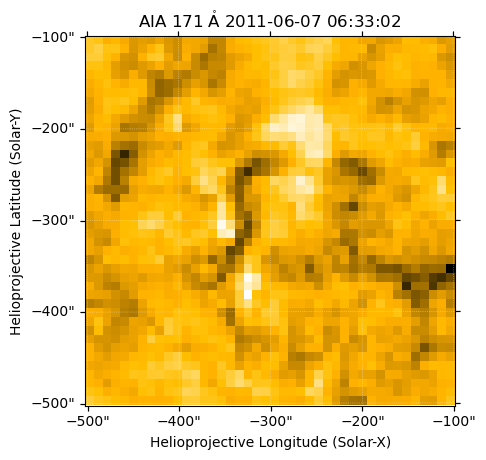

In [247]:
#combine multiple pixels into one pixel using superpixel() function
#increase signal-to-noise ratio
super_sub_map = sub_map.superpixel((4,4)*u.pixel)

fig = plt.figure()
ax = fig.add_subplot(projection=super_sub_map)
super_sub_map.plot(axes=ax)
plt.show()

Observatory,SOHO
Instrument,EIT
Detector,EIT
Measurement,195.0 Angstrom
Wavelength,195.0 Angstrom
Observation Date,2011-06-07 20:37:52
Exposure Time,12.594 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.63 2.63] arcsec / pix
Reference Pixel,[509.91 520.06] pix

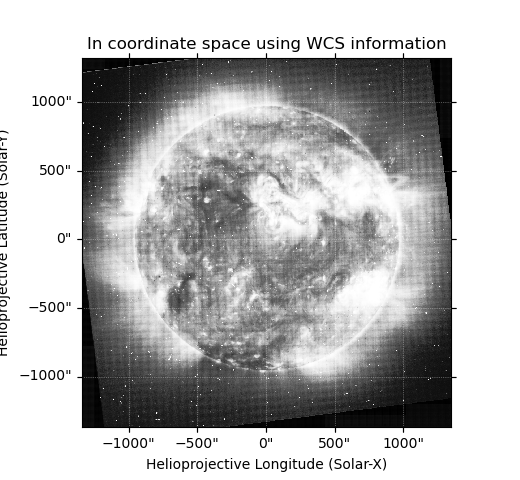
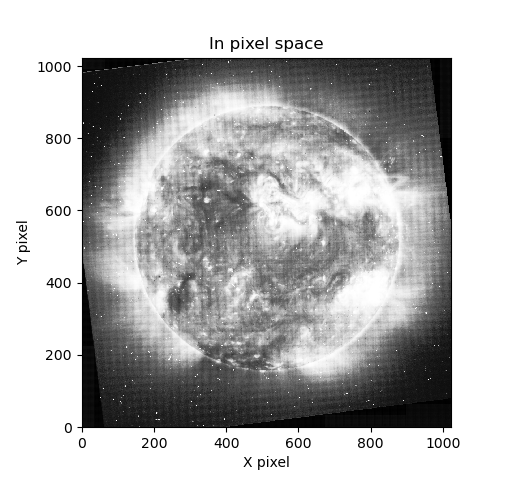
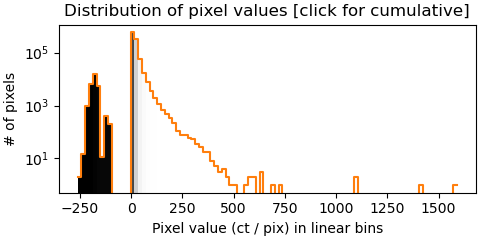
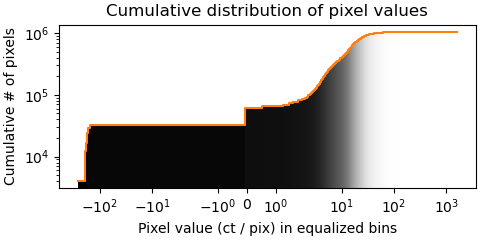

In [249]:
#create a map sequence, ordered list of maps
another_map = sunpy.map.Map(sunpy.data.sample.EIT_195_IMAGE)
map_seq = sunpy.map.Map([map, another_map], sequence=True)
map_seq[1]

<h3>TIMESERIES</h3>

`TimeSeries` objects hold time-dependent data with their accompanying metadata. They can be used with multiple one-dimensional arrays which are all associated with a common time axis. Much like the `Map` object, the `TimeSeries` object can handle generic data, but also provides instrument specific data loading and plotting capabilities. Importantly, `TimeSeries` allows you to select specific time ranges or combine multiple `TimeSeries` in a metadata-aware way.

<sunpy.timeseries.sources.goes.XRSTimeSeries object at 0x307de3f10>
SunPy TimeSeries
----------------
Observatory:			GOES-15
Instrument:			<a href=https://www.swpc.noaa.gov/products/goes-x-ray-flux target="_blank">X-ray Detector</a>
Channel(s):			xrsa<br>xrsb
Start Date:			2011-06-07 00:00:00
End Date:			2011-06-07 23:59:58
Center Date:			2011-06-07 11:59:58
Resolution:			2.048 s
Samples per Channel:		42177
Data Range(s):		xrsa   3.64E-06<br>xrsb   2.54E-05
Units:			W / m2
                                       xrsa          xrsb
2011-06-06 23:59:59.961999893  1.000000e-09  1.887100e-07
2011-06-07 00:00:02.008999944  1.000000e-09  1.834600e-07
2011-06-07 00:00:04.058999896  1.000000e-09  1.860900e-07
2011-06-07 00:00:06.104999900  1.000000e-09  1.808400e-07
2011-06-07 00:00:08.151999950  1.000000e-09  1.860900e-07
...                                     ...           ...
2011-06-07 23:59:49.441999912  1.000000e-09  1.624800e-07
2011-06-07 23:59:51.488999844  1.000000e-09  1.624800e-07
2011-06-07 23:59:53.538999915  1.000000e-09  1.598500e-07
2011-06-07 23:59:55.584999919  1.000000e-09  1.624800e-07
2011-06-07 23:59:57.631999850  1.000000e-09  1.598500e-07

[42177 rows x 2 columns]
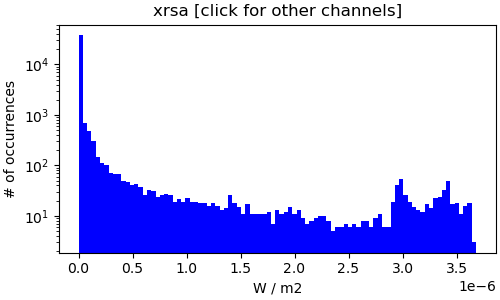
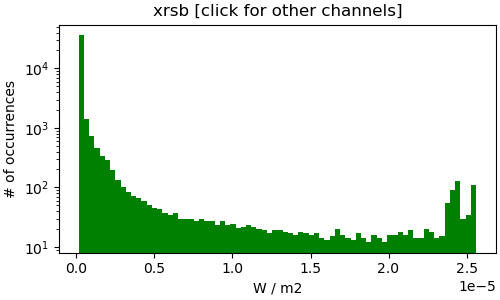
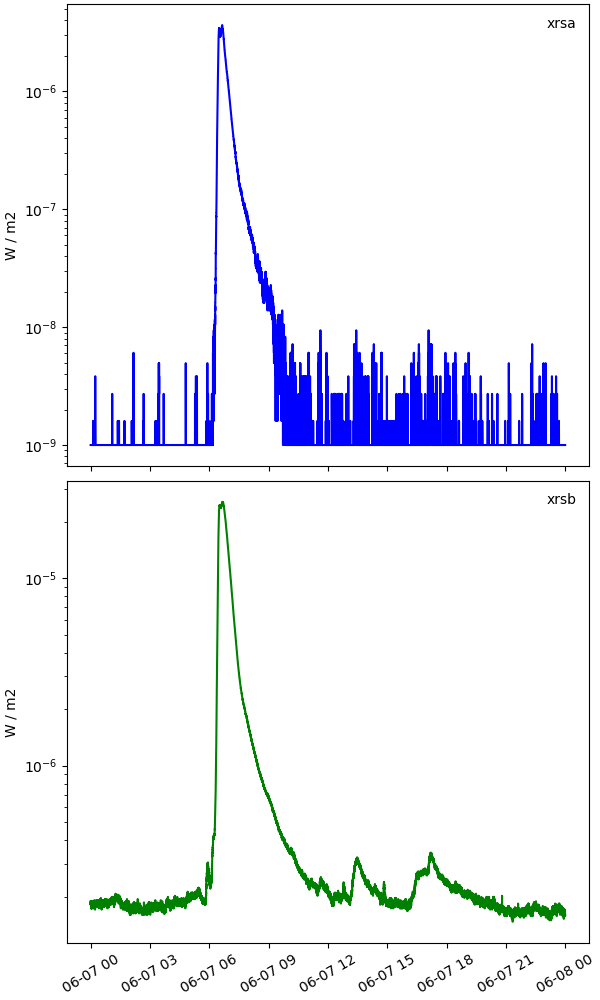
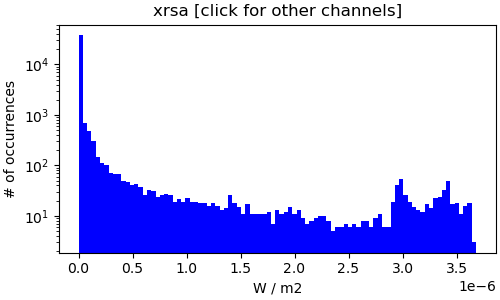

In [251]:
import sunpy.timeseries
from sunpy.data.sample import GOES_XRS_TIMESERIES

ts = sunpy.timeseries.TimeSeries(GOES_XRS_TIMESERIES)
ts

In [253]:
# pull out data from columns
print(ts.columns)
ts.quantity('xrsa') #returns a Quantity object

['xrsa', 'xrsb']


<Quantity [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09] W / m2>

In [255]:
# Time object and TimeRange object
ts.time
ts.time_range

    Start: 2011-06-06 23:59:59
    End:   2011-06-07 23:59:57
    Center:2011-06-07 11:59:58
    Duration:0.9999730324069096 days or
           23.99935277776583 hours or
           1439.9611666659498 minutes or
           86397.66999995698 seconds

In [257]:
#get metadata
ts.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2011-06-06T23:59:59.961999 | xrsa            | simple: True                                      |
|            to             | xrsb            | bitpix: 8                                         |
|2011-06-07T23:59:57.631999 |                 | naxis: 0                                          |
|                           |                 | extend: True                                      |
|                           |                 | date: 26/06/2012                                  |
|                           |                 | numext: 3                                         |
|                           |                 | telescop: GOES 15                                 |


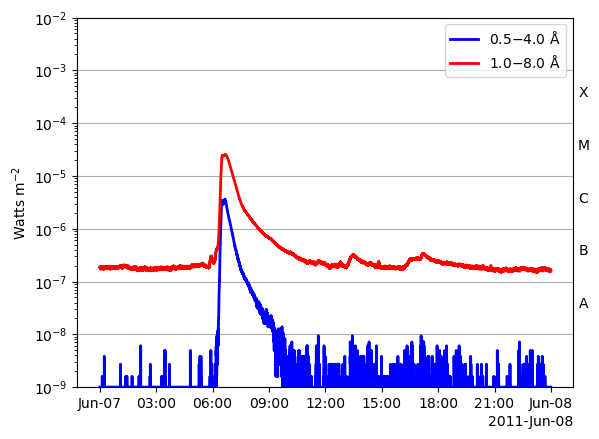

In [259]:
#visualize TimeSeries in matplotlib
fig, ax = plt.subplots()
ts.plot(axes=ax)
plt.show()

In [263]:
#add columns to timeseries
values = ts.quantity('xrsa') * 2
ts = ts.add_column('xrsa*2', values)
ts.columns

['xrsa', 'xrsb', 'xrsa*2']

In [264]:
t_range = TimeRange('2012-06-01 05:00', '2012-06-01 06:30')
short_ts = ts.truncate(t_range)

Concatenate: combine a number of TimeSeries together into a single `TimeSeries`. This can be performed using the `TimeSeries` factory with the `concatenate=True` keyword argument:

`concatenated_timeseries = sunpy.timeseries.TimeSeries(filepath1, filepath2, source='XRS', concatenate=True)`

`concatenated_timeseries = goes_timeseries_1.concatenate(goes_timeseries_2)`

Note: sometimes it is needed to explicitly state source using the keyword